<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Top_ten_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url  = [ #ibra50
  'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBr50.csv'
#ibra100
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBr100.csv'
#div
  , 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Idiv.csv' 
#ibov
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Ibov.csv'
#small
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Small.csv'
]

escolha = int(input('0-ibra50; 1-ibra100; 2-idiv; 3-ibov; 4-smal: '))
indice = { 0:'Ibra50' , 1:'Ibra100' , 2:'Idiv' , 3:'Ibov' , 4:'Small'}
df = pd.read_csv(url[escolha] ,sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , encoding='latin-1',index_col=False , engine='python')

data = yf.download((df['Código']+'.SA').to_list(),
                         period="3mo",
                         interval="1d",
                         auto_adjust=True,
                         back_adjust=True,
                         prepost=True)

[*********************100%%**********************]  50 of 50 completed


In [9]:
data_close = data['Close']
data_returns = data_close.pct_change(1).dropna()
data_returns.head()

Ticker,AALR3.SA,ABCB4.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMAR3.SA,AMBP3.SA,ANIM3.SA,...,UNIP6.SA,USIM5.SA,VAMO3.SA,VIVA3.SA,VLID3.SA,VULC3.SA,VVEO3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,-0.182692,-0.050779,-0.030032,-0.025084,-0.030132,-0.080039,-0.033640,-0.064516,-0.041231,-0.031390,...,-0.015276,-0.017223,-0.065541,-0.006715,0.004878,-0.020854,-0.038710,-0.057931,-0.046833,-0.014035
2024-01-03,0.010588,0.020105,0.005021,-0.006912,0.000000,0.030075,0.004269,-0.054598,0.012837,-0.023148,...,0.004376,-0.005476,0.022317,0.016167,0.027184,-0.014199,-0.043997,0.014641,-0.021526,0.032029
2024-01-04,0.006985,-0.021422,0.000833,-0.010054,-0.020583,-0.064651,-0.004905,-0.051672,-0.028517,-0.040284,...,-0.022046,-0.015419,-0.002079,-0.027480,-0.013705,-0.026235,-0.026521,-0.028860,-0.019608,-0.193104
2024-01-05,0.025434,0.026270,0.009151,0.000781,0.000397,0.045708,0.004601,0.000000,0.000000,0.019753,...,-0.001350,-0.002237,0.022917,0.002082,-0.005750,0.020602,0.034455,0.002972,0.014634,-0.008547
2024-01-08,-0.007892,0.025171,0.018961,0.003903,0.011494,0.033049,-0.000654,0.019231,0.045010,0.062954,...,0.012030,-0.006727,0.020367,0.029682,0.001446,0.009317,0.056545,0.011852,0.010577,0.023707


Vamos remover ações que esticaram muito em um único dia;eliminar todas as linhas que cresceram mais de 20% em um dia.

In [24]:
print(data_returns.shape)
# set the growth theshold
daily_growth_threshold = 0.2
# keep only the columns without a daily growth that big
data_returns = data_returns.loc[:, ~(data_returns >=daily_growth_threshold).any()]
print(data_returns.shape)


(61, 114)
(61, 114)


In [25]:
# calculate the cumulative daily growth
data_cum_returns = (1 + data_returns).cumprod() -1

#### The  Top Ten  


In [14]:
# take the last row, transpose, x100
latest = data_cum_returns.tail(1).T.mul(100)
latest.columns = ['% change']
topten = round(latest.sort_values(by='% change', ascending=False)[:10], 2)
topten

,% change
Ticker,
ENAT3.SA,46.94
POSI3.SA,43.97
STBP3.SA,43.93
CEAB3.SA,35.89
GUAR3.SA,26.91
RRRP3.SA,25.53
PLPL3.SA,25.23
CIEL3.SA,20.26
MLAS3.SA,17.22


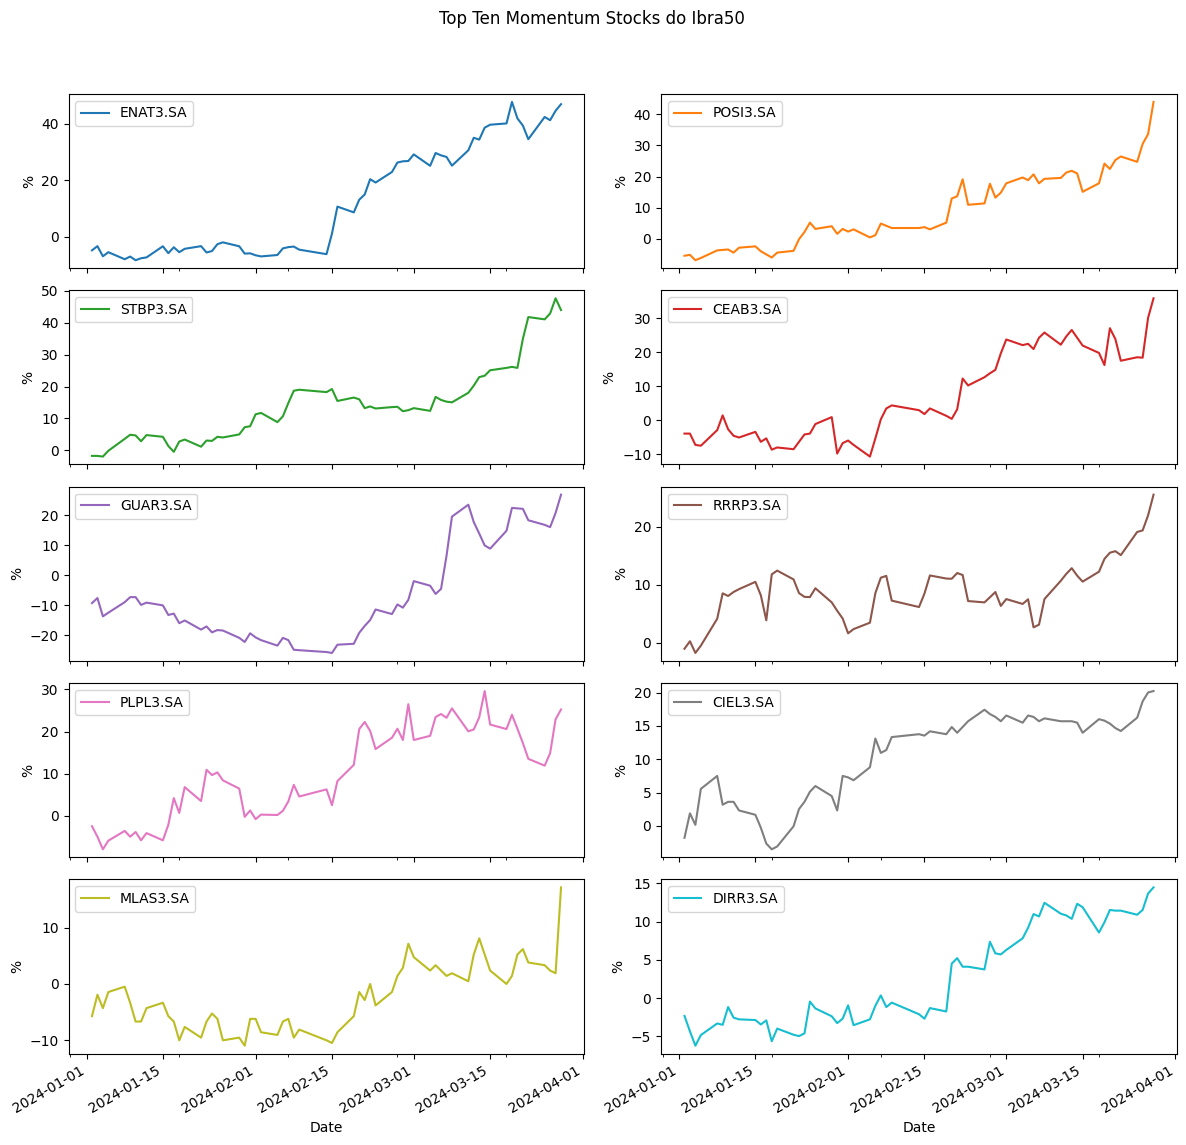

In [26]:
# plot the current top ten
data_cum_returns[list(topten.index)].mul(100).plot(subplots=True,
                                          layout=(5, 2),
                                          figsize=(12,12),
                                          sharex=True,
                                          ylabel='%',
                                          title=f'Top Ten Momentum Stocks do {indice[escolha]}')
# tweek the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Infos


In [27]:
topten.index

Index(['ENAT3.SA', 'POSI3.SA', 'STBP3.SA', 'CEAB3.SA', 'GUAR3.SA', 'RRRP3.SA',
       'PLPL3.SA', 'CIEL3.SA', 'MLAS3.SA', 'DIRR3.SA'],
      dtype='object', name='Ticker')

In [28]:
# get further information
topten_info = {}
for i in topten.index:
    topten_info[i] = yf.Ticker(i).get_info()
# add the information to a data frame
info_df = pd.DataFrame.from_dict(topten_info,orient='index')
# add the growth data
info_df['Growth'] = topten
# rank the companies by growth rate
info_df.sort_values(by=['Growth'], ascending=False, inplace=True)
info_df.head()

,address1,address2,city,state,zip,country,phone,fax,website,industry,...,trailingAnnualDividendYield,lastSplitFactor,lastSplitDate,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,Growth
ENAT3.SA,"Avenida Almirante Barroso, 52",suite 1301 (part) Centro,Rio De Janeiro,RJ,20031-918,Brazil,55 21 3509 5800,55 21 3509 5958,https://www.enauta.com.br,Oil & Gas E&P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.94
POSI3.SA,"Rua JoAo Bettega, 5200 - CIC",NaN,Curitiba,PR,81350-000,Brazil,55 41 3239 7300,NaN,https://www.positivotecnologia.com.br,Computer Hardware,...,0.055269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.97
STBP3.SA,"413, Joaquim Floriano Street",10th floor Itaim Bibi,São Paulo,SP,04534-011,Brazil,55 11 3279 3279,NaN,https://www.santosbrasil.com.br,Marine Shipping,...,0.034773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.93
CEAB3.SA,"Alameda Araguaia, 1.222",NaN,Barueri,SP,06455-000,Brazil,55 11 4571 2960,NaN,https://www.cea.com.br,Specialty Retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.89
GUAR3.SA,Rua Lemos Monteiro,no 120 ButantA,São Paulo,SP,NaN,Brazil,55 11 2281 2137,NaN,https://ri.riachuelo.com.br,Apparel Retail,...,NaN,8:1,1.556755e+09,NaN,NaN,NaN,NaN,NaN,NaN,26.91


#### Setores das top ten

In [19]:
info_df['sector'].value_counts()

sector
Technology           3
Energy               2
Consumer Cyclical    2
Real Estate          2
Industrials          1
Name: count, dtype: int64